In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

from sklearn.model_selection import train_test_split

In [2]:
# This CSV file contains a dataset of 240 stars of 6 classes:

# Brown Dwarf -> Star Type = 0

# Red Dwarf -> Star Type = 1

# White Dwarf-> Star Type = 2

# Main Sequence -> Star Type = 3

# Supergiant -> Star Type = 4

# Hypergiant -> Star Type = 5

# The Luminosity and radius of each star is calculated w.r.t. that of the values of Sun.
# Lo = 3.828 x 10^26 Watts
# Ro = 6.9551 x 10^8 m

stars = pd.read_csv("stars.csv")
stars.head()

,Temperature(K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [3]:
redwhitedwarfs = stars[ (stars["Star type"] == 1) | (stars["Star type"] == 2) ]

<Axes: xlabel='Temperature(K)', ylabel='Radius(R/Ro)'>

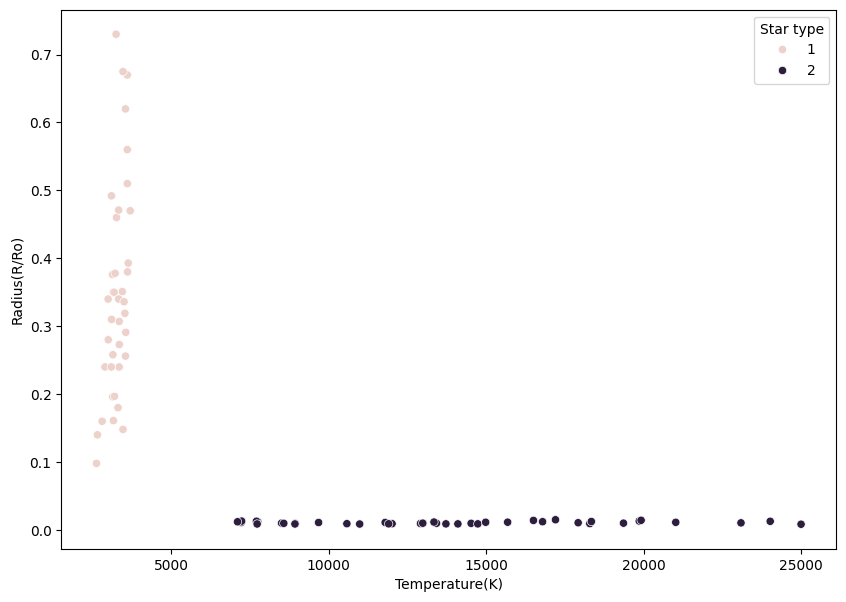

In [4]:
sns.scatterplot(data=redwhitedwarfs,x="Temperature(K)",y="Radius(R/Ro)", hue="Star type")

In [5]:
# test train split

X = redwhitedwarfs[["Temperature(K)","Radius(R/Ro)"]]
y = redwhitedwarfs[["Star type"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
clf = LogisticRegression(tol=1e-10, random_state=99,fit_intercept=True,  max_iter=10000)
#clf = Perceptron(tol=1e-10, random_state=99, eta0=1e-15,fit_intercept=True,  max_iter=10000)

clf.fit(X_train.to_numpy(), y_train.to_numpy().flatten())

,penalty,'l2'
,dual,False
,tol,1e-10
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,99
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [7]:
data_test = X_test.copy()
data_test["groundtruth"] = y_test["Star type"]
data_test["predicted"]=clf.predict(X_test.to_numpy())

(-3.0, 3.0)

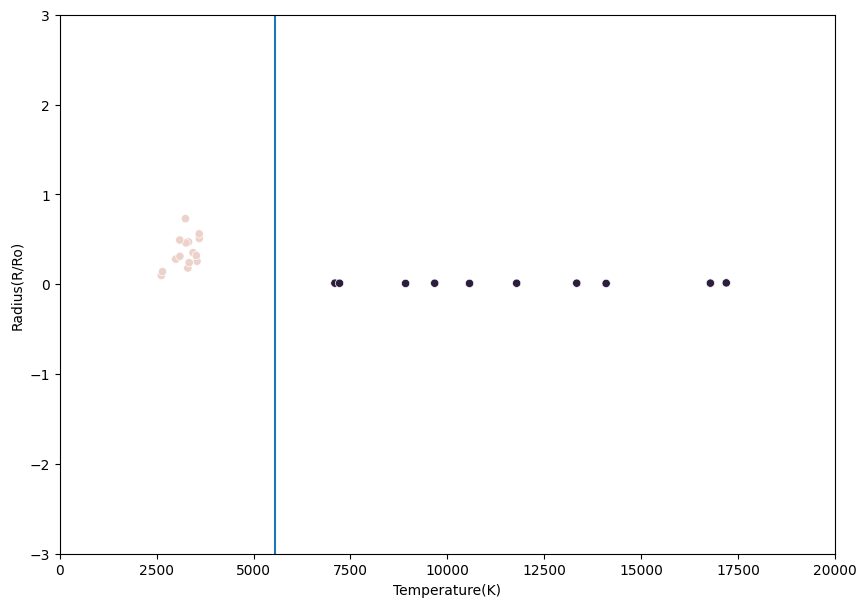

In [8]:
sns.scatterplot(data=data_test, x = "Temperature(K)", y = "Radius(R/Ro)", hue = "groundtruth")
f = lambda x: (-clf.coef_[0][0]*x  - clf.intercept_[0]) / clf.coef_[0][1]


x1,x2 = -10000,10000
plt.plot([x1,x2],[f(x1),f(x2)])
plt.legend().remove()
plt.xlim(0,20000)
plt.ylim(-3,3)

In [9]:
import pickle
pickle.dump(clf,open("model.pickle",'wb'))

In [10]:
clf.predict([[1,2]])[0]

np.int64(1)